In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('ex1data2.txt', header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
#This data set contains the price of houses and a couple of their features
#The first column is the size of the house, in feet
#The second column is the number of bedrooms
#The third column is the price 

In [4]:
size = df[0]
bedrooms = df[1]
y = (df[2]).to_numpy()

In [5]:
#Normalize features by subtracting their mean value and dividing by their standard deviation (abbreviated std)
#Note: it's useful to save the values of the mean and std so as to have them later

In [6]:
size_mean = np.mean(size)
size_std = np.std(size)

bedrooms_mean = np.mean(bedrooms)
bedrooms_std = np.std(bedrooms)

In [7]:
size = (size-size_mean)/size_std
bedrooms = (bedrooms - bedrooms_mean)/bedrooms_std

In [8]:
#Add a column of 1s to X, which represent X0
#Create a matrix X consisting of X0 X1 and X2 values
#To do that first get size and bedrooms from panda series to numpy arrays

In [9]:
size_numpy = size.to_numpy()
bedrooms_numpy = bedrooms.to_numpy()
X0 = np.ones(len(df))

In [10]:
X = np.column_stack((X0,size_numpy,bedrooms_numpy))

In [11]:
#Initiate theta values at 0
#Second line converts theta to a (3,) array (from (3,1)) allowing for simpler multiplication

In [12]:
theta1 = np.zeros((3,1))
theta = theta1.reshape((len(theta1,)))
print(theta)

[0. 0. 0.]


In [13]:
def hypothesis(theta,X):
    return np.dot(X,theta)

In [14]:
m = len(df)
def cost_function(theta,X,y):
    return (1/(2*m))*sum((np.subtract(hypothesis(theta,X),y))**2)

In [15]:
def gradient_descent(theta,X,y,alpha,iterations):
    J = []
    for i in range(iterations):
        h_x = hypothesis(theta,X)
        for c in range(0,(len(theta))):
            theta[c] -= (alpha/m)*sum((np.subtract(h_x,y)*X[:,c]))
        j = cost_function(theta,X,y)
        J.append(j)
    return J, j, theta

In [16]:
J, j, theta = gradient_descent(theta,X,y,0.1,50)
print(theta)

[338658.2492493  103322.82942954   -474.74249522]


Text(0, 0.5, 'J    (cost)')

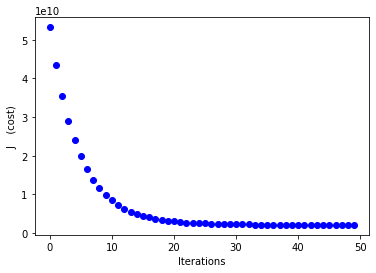

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(range(0,50)),J,'bo')
plt.xlabel('Iterations')
plt.ylabel('J    (cost)')

In [18]:
y_predict = hypothesis(theta, X)

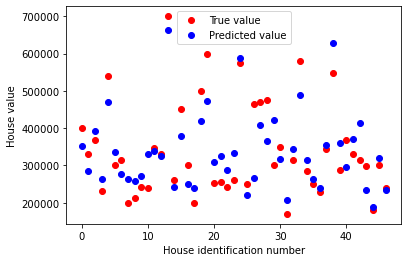

In [19]:
plt.figure()
plt.plot(range(0,47),y,'ro', label = 'True value')
plt.plot(range(0,47),y_predict,'bo', label = 'Predicted value')
plt.ylabel('House value')
plt.xlabel('House identification number')
plt.legend(loc = 'best')